# Setup

In [1]:
# data processing
import pandas as pd

# top2vec
from top2vec import Top2Vec

# data visualisation
import matplotlib.pyplot as plt

In [2]:
# import data
df = pd.read_excel("output/obama_speeches_clean.xlsx", index_col = 0)

content_list = df['content_nouns'].tolist()

# Top2Vec

In [5]:
# train top2vec model
model = Top2Vec(documents=content_list)

2022-08-14 20:58:10,207 - top2vec - INFO - Pre-processing documents for training
2022-08-14 20:58:10,942 - top2vec - INFO - Creating joint document/word embedding
2022-08-14 20:58:22,979 - top2vec - INFO - Creating lower dimension embedding of documents
2022-08-14 20:58:26,210 - top2vec - INFO - Finding dense areas of documents
2022-08-14 20:58:26,236 - top2vec - INFO - Finding topics


In [6]:
# print number of detected topics
topic_sizes, topic_nums = model.get_topic_sizes()
{"topic_sizes":topic_sizes, 
 "topic_ids":topic_nums}

{'topic_sizes': array([200,  72,  71,  62,  23], dtype=int64),
 'topic_ids': array([0, 1, 2, 3, 4], dtype=int64)}

In [7]:
# get parameters
topic_words, word_scores, topic_nums = model.get_topics()

# print topics and associated keywords
for words, scores in zip(topic_words, word_scores):
    print(f"keywords: {words}\n")

keywords: ['men' 'life' 'define' 'journey' 'god' 'courage' 'division' 'humanity'
 'bless' 'endure' 'honor' 'comfort' 'spirit' 'inspire' 'eye' 'word'
 'dignity' 'man' 'hero' 'remember' 'love' 'equality' 'hop' 'memory'
 'celebrate' 'others' 'strength' 'corner' 'truth' 'injustice' 'soldier'
 'character' 'faith' 'history' 'struggle' 'freedom' 'body' 'name' 'heart'
 'conscience' 'peace' 'story' 'legacy' 'willingness' 'compassion' 'blood'
 'wisdom' 'pray' 'war' 'stand']

keywords: ['tax' 'deficit' 'debt' 'income' 'recession' 'pay' 'business' 'job'
 'credit' 'waste' 'spend' 'create' 'economy' 'cut' 'mortgage' 'taxpayer'
 'loan' 'recovery' 'money' 'afford' 'rat' 'investment' 'company' 'budget'
 'manufacture' 'pocket' 'bill' 'dollar' 'bank' 'auto' 'customer' 'card'
 'research' 'code' 'industry' 'collapse' 'growth' 'product' 'reward'
 'creation' 'consumer' 'medicare' 'package' 'cost' 'profit' 'crisis'
 'worker' 'unemployment' 'math' 'revenue']

keywords: ['official' 'review' 'team' 'agency' 'res

# Create Word Clouds

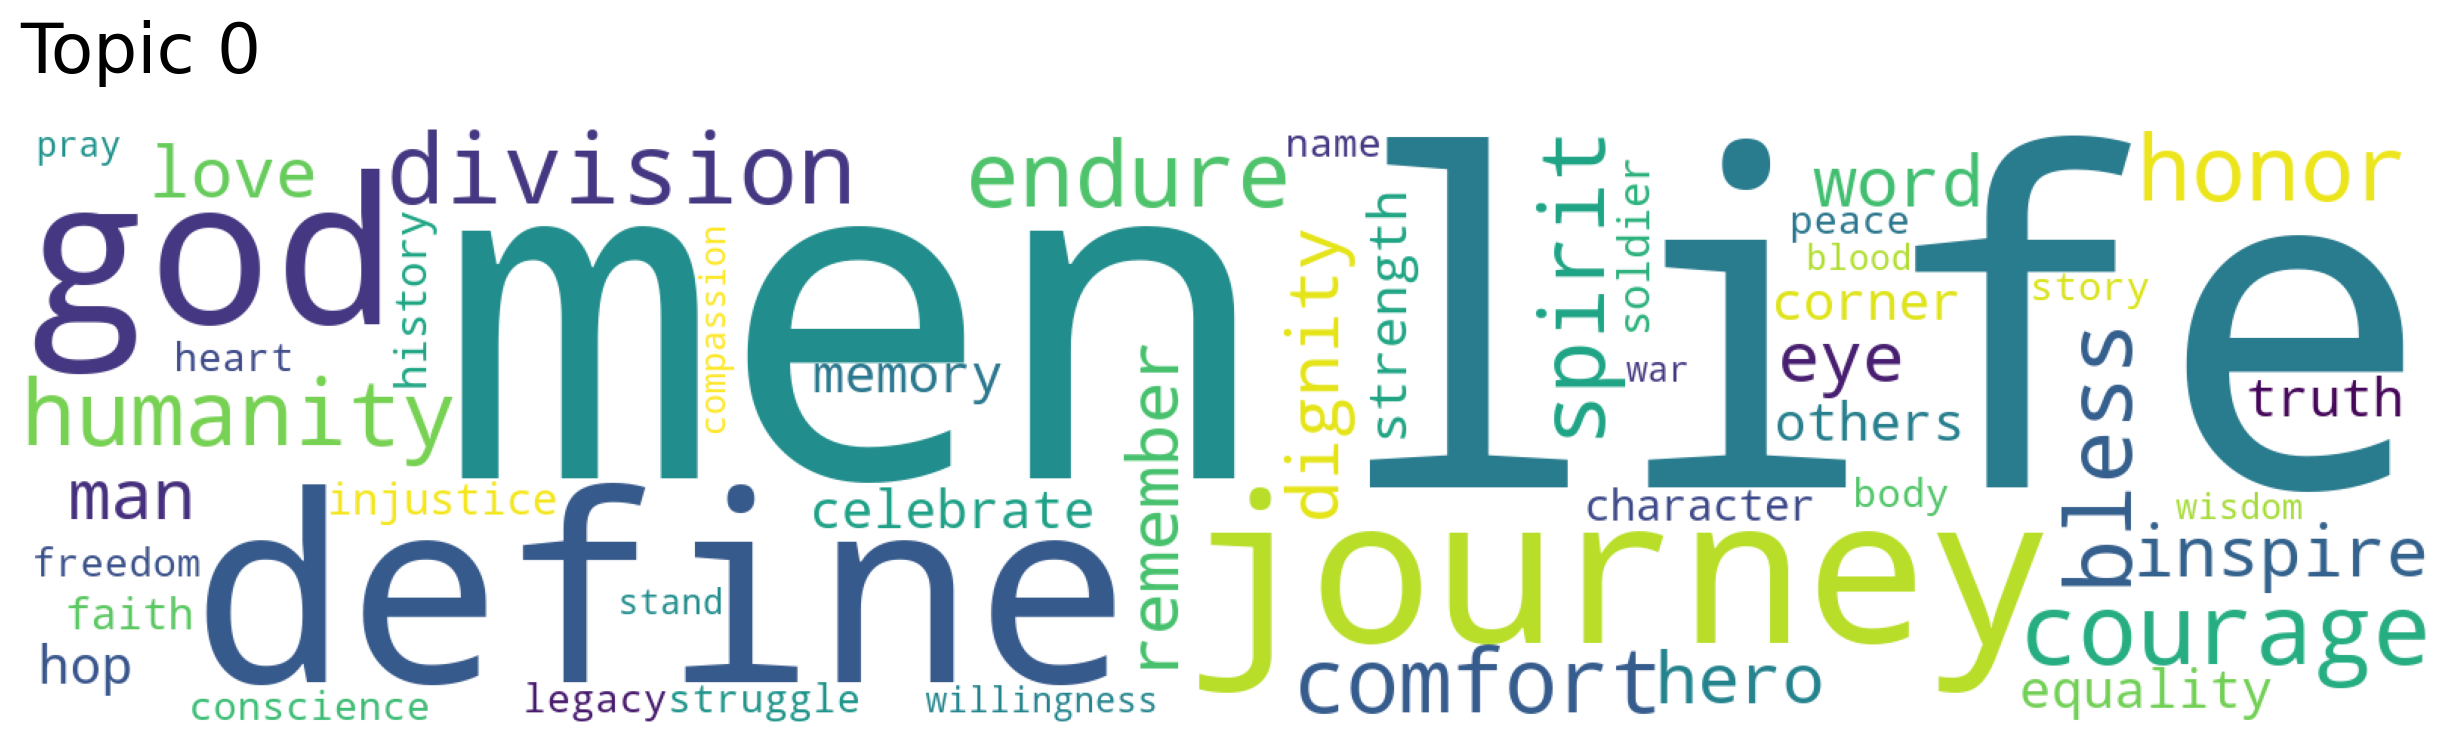

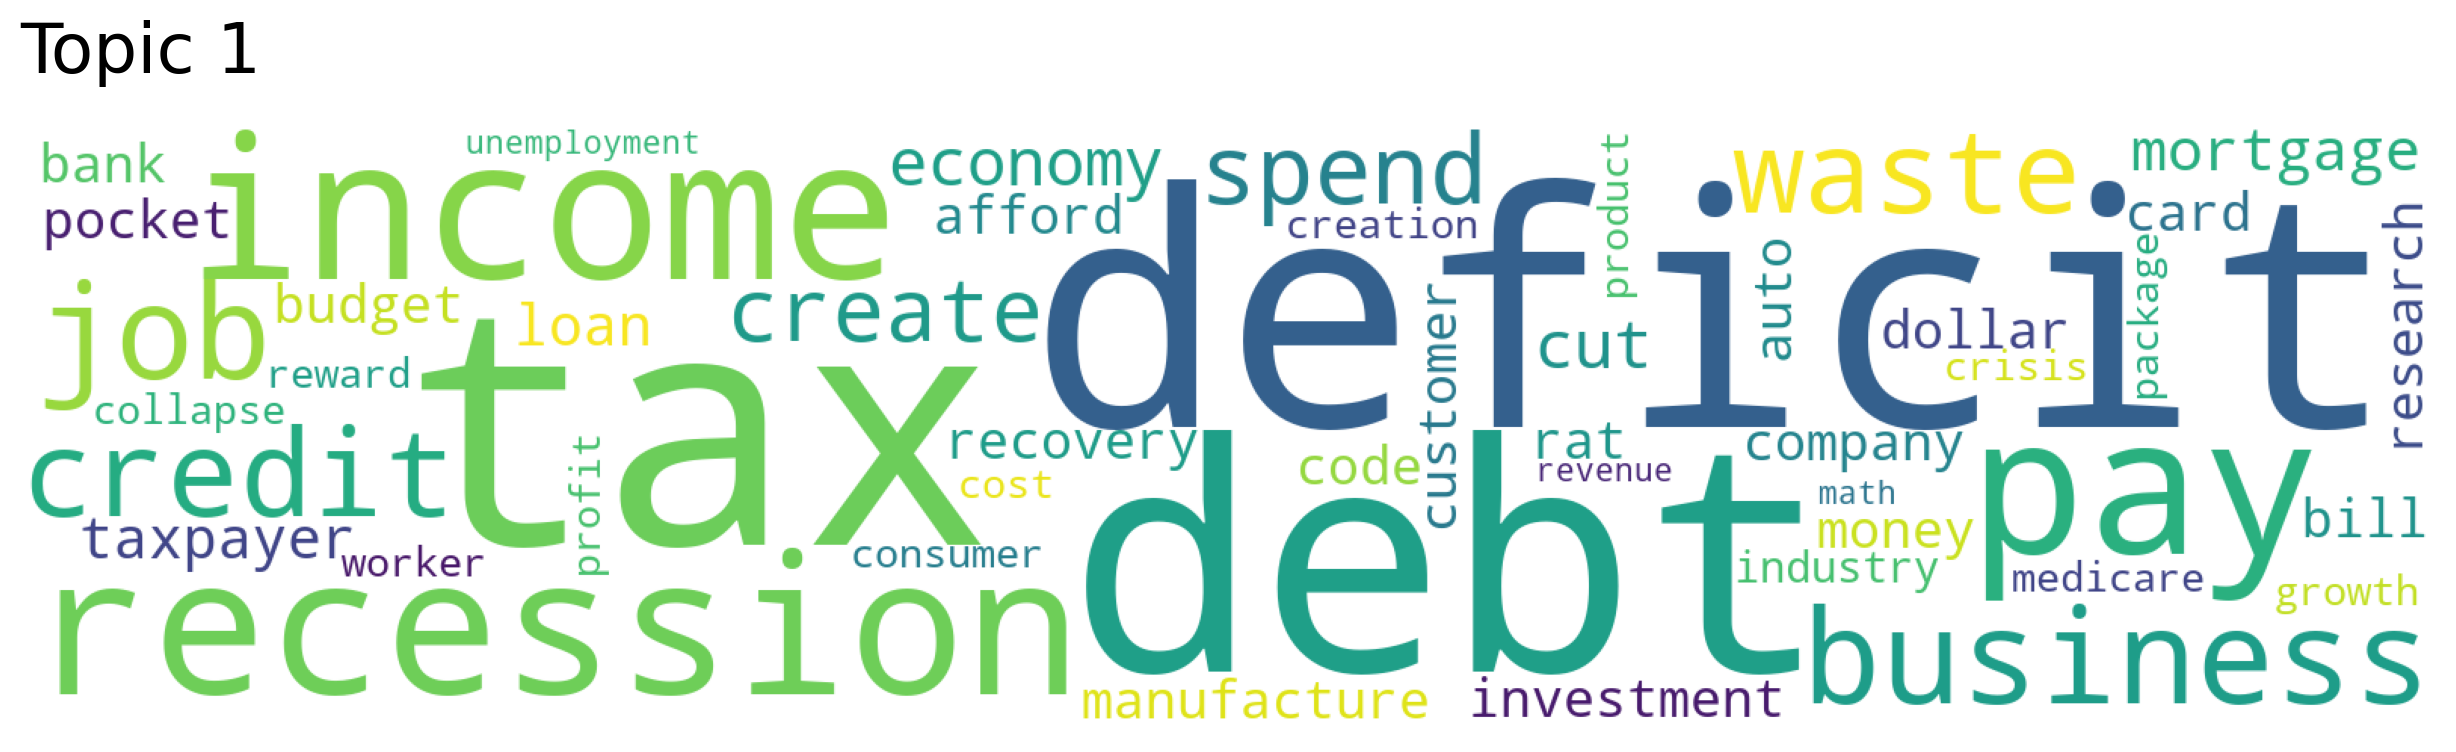

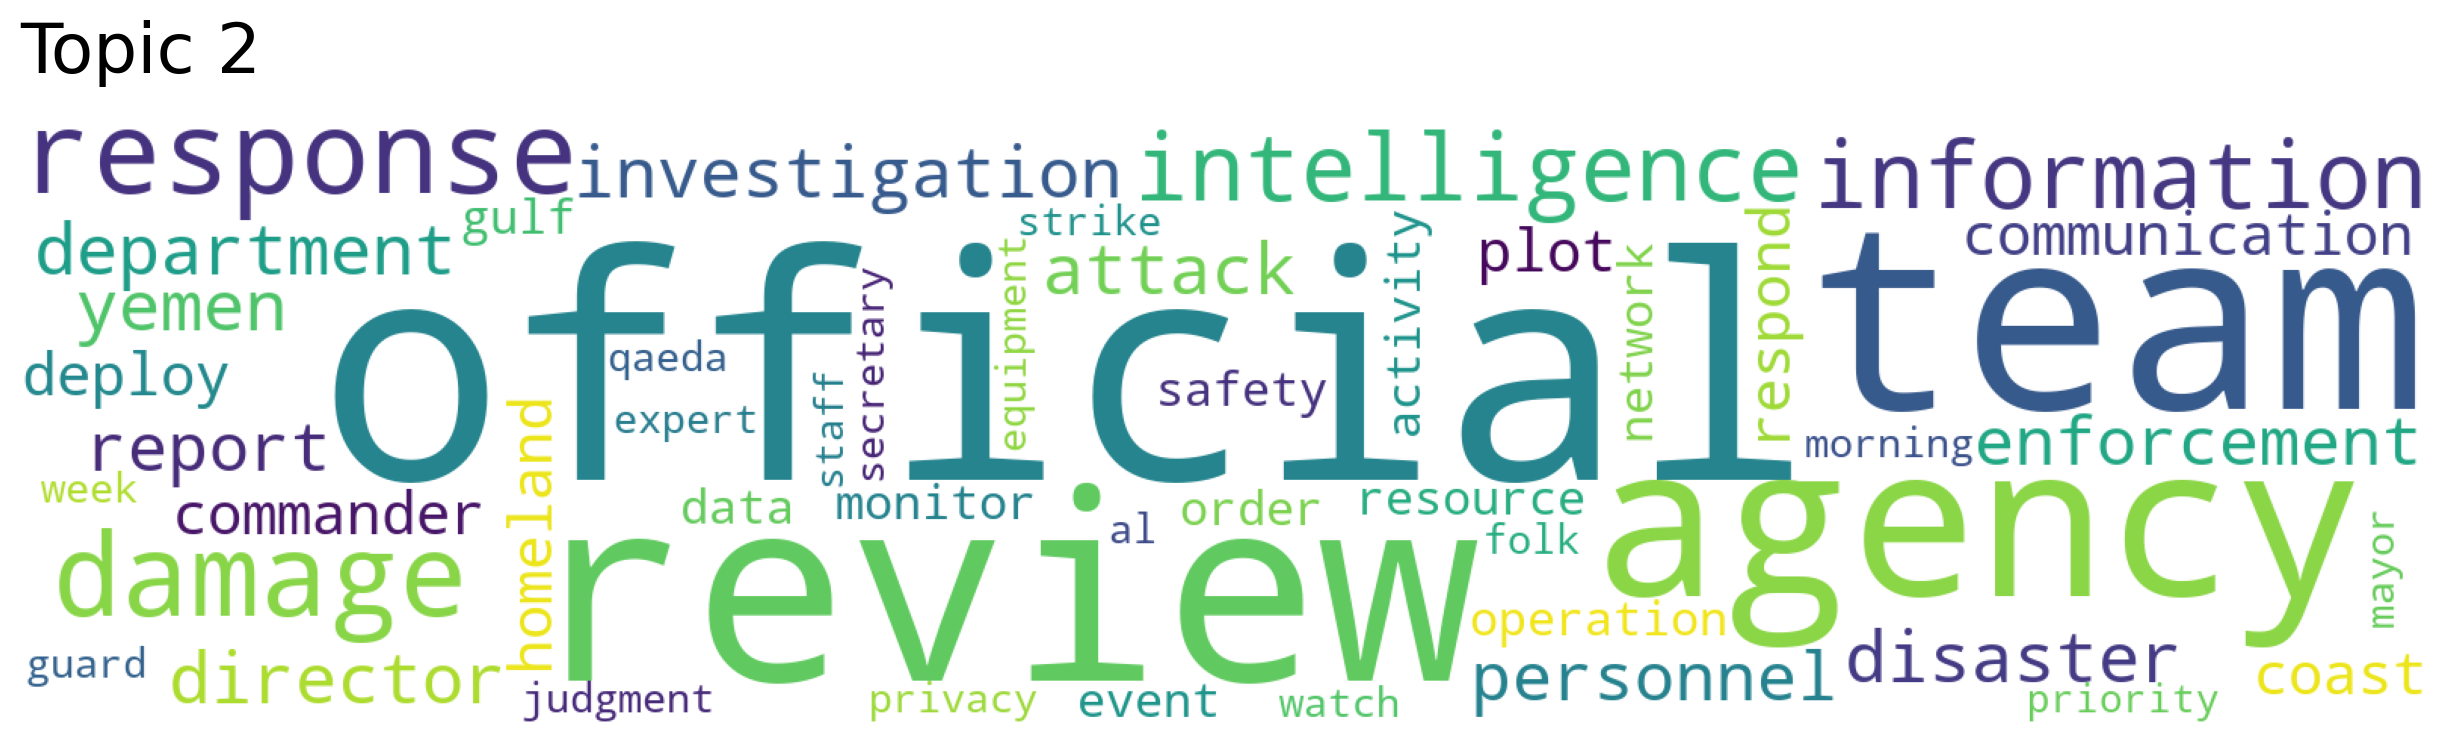

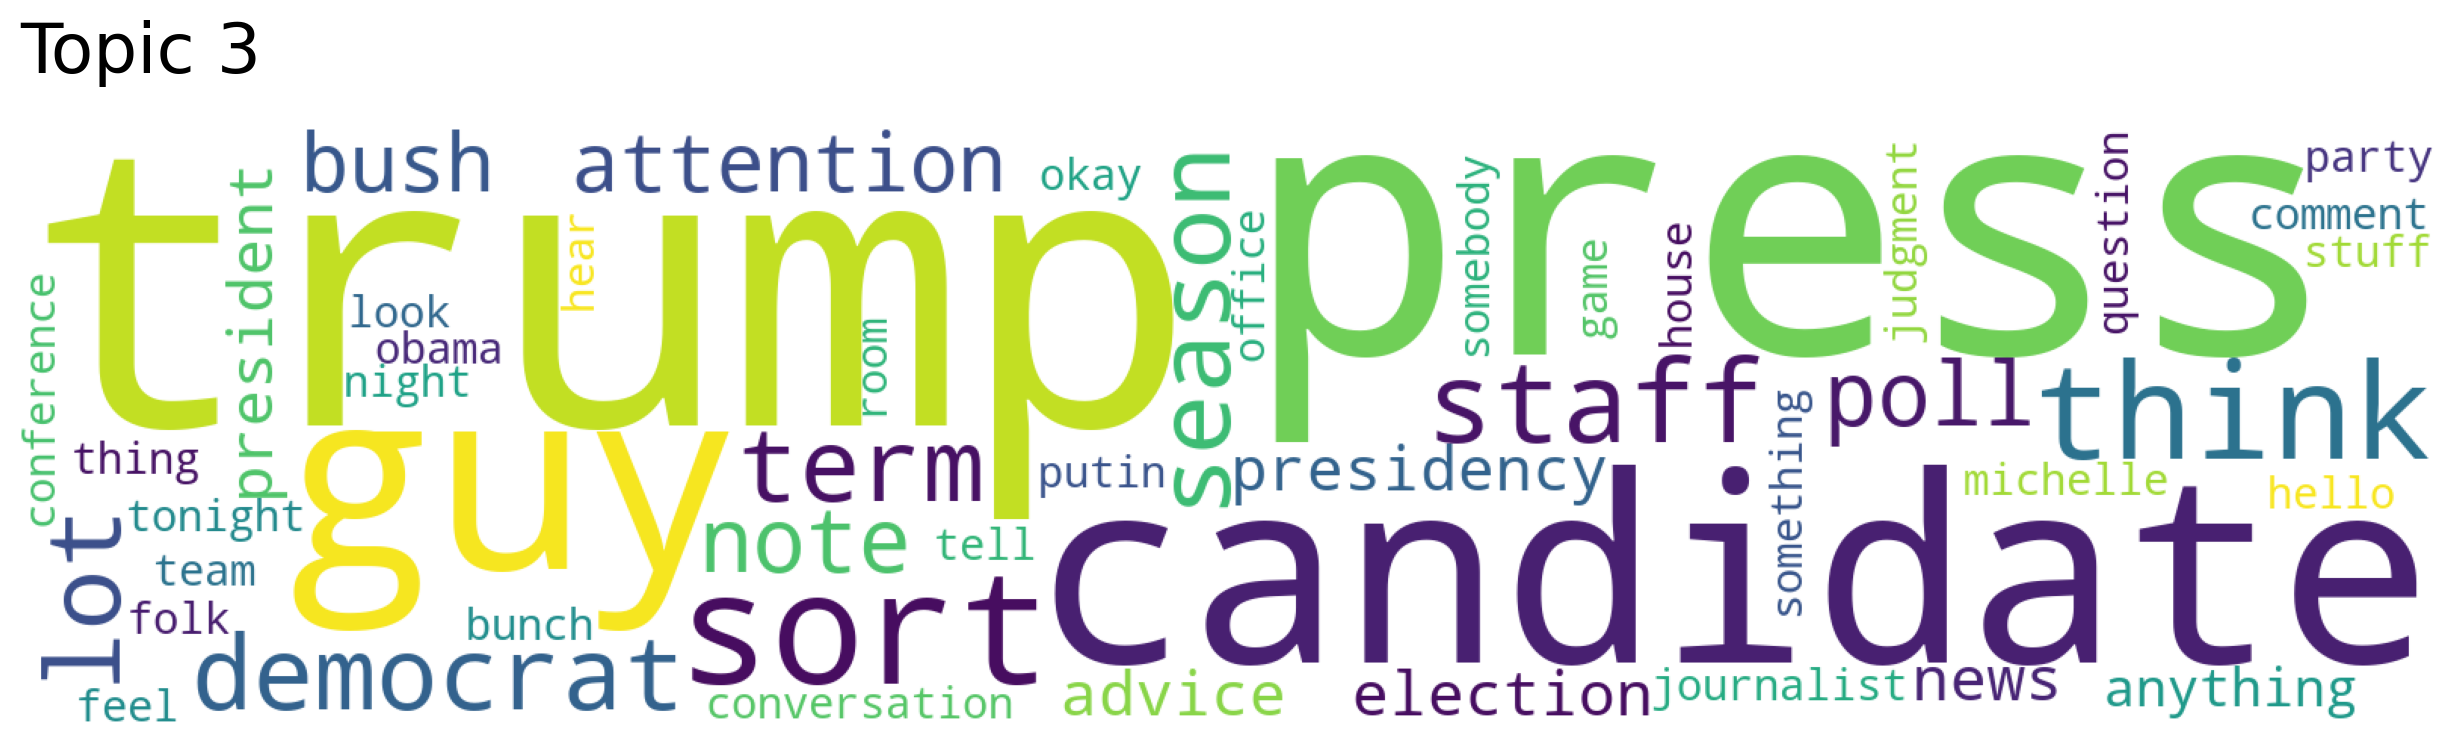

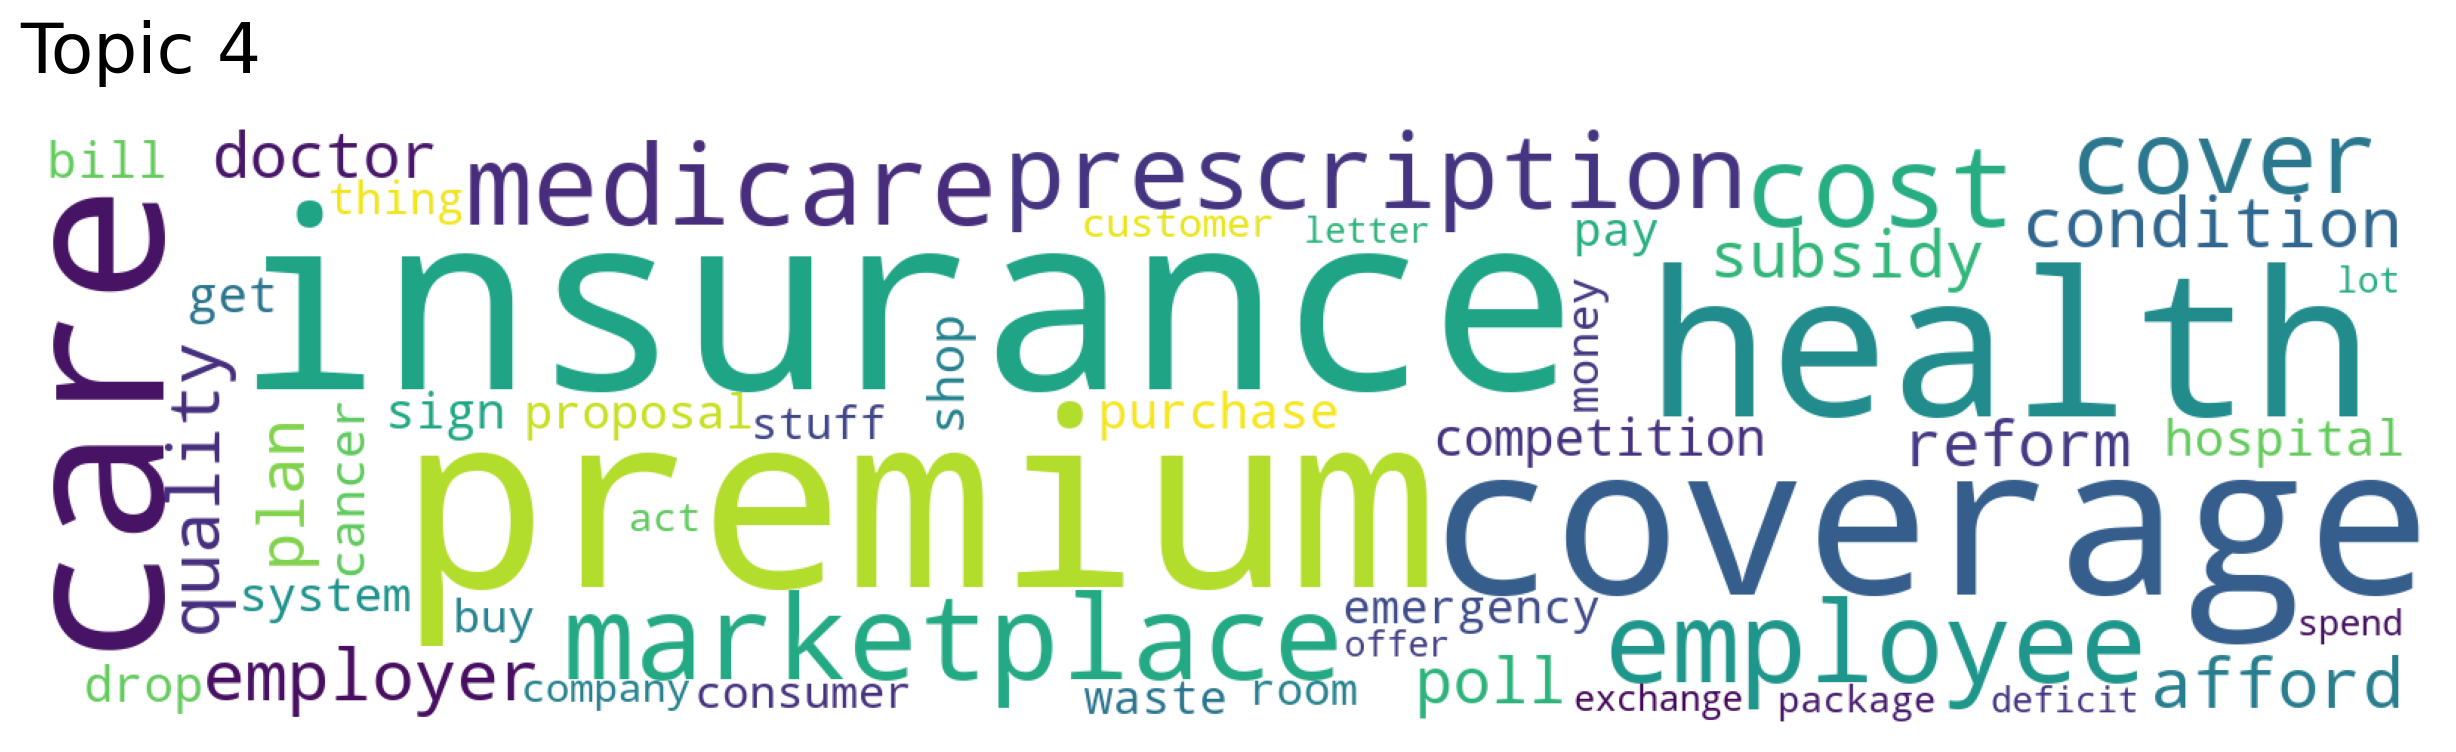

In [8]:
# get word clouds
i = 0
for topic in topic_nums:
    model.generate_topic_wordcloud(topic, background_color = "white")
    plt.show()
    print("\n")
    i = i + 1

# Explore Classification of Topics

In [9]:
#Divide the topics into 2 categories
model.hierarchical_topic_reduction(num_topics=2)
model.get_topic_hierarchy()

[[2, 3, 0], [4, 1]]

In [10]:
#Divide the topics into 3 categories
model.hierarchical_topic_reduction(num_topics=3)
model.get_topic_hierarchy()

[[3, 0], [2], [4, 1]]

In [11]:
#Divide the topics into 4 categories
model.hierarchical_topic_reduction(num_topics=4)
model.get_topic_hierarchy()

[[0], [2], [4, 1], [3]]